In [1]:
# titanic.csv import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./datasets/pima_diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# feature와 label 분리

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [12]:
# feature StandardScaling

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [13]:
X_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [15]:
X_scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [16]:
# train test 분리

X_train, X_test, y_train , y_test = train_test_split(X_scaled , y , test_size=0.2 , random_state=42)

In [20]:
# Logistic regrssion 을 이용한 학습
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1]

In [21]:
acc = accuracy_score(y_test , pred)
prec = precision_score(y_test , pred)
rec = recall_score(y_test , pred)
auc_score = roc_auc_score(y_test , pred_proba_1)
print(f'정확도 : {acc}')
print(f'정밀도 : {prec}')
print(f'재현율 : {rec}')
print(f'roc_auc 값은  : {auc_score}')

정확도 : 0.7532467532467533
정밀도 : 0.6491228070175439
재현율 : 0.6727272727272727
roc_auc 값은  : 0.8146923783287419


In [28]:
# 의사결정나무를 이용한 학습
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1]

In [29]:
acc = accuracy_score(y_test , pred)
prec = precision_score(y_test , pred)
rec = recall_score(y_test , pred)
auc_score = roc_auc_score(y_test , pred_proba_1)
print(f'정확도 : {acc}')
print(f'정밀도 : {prec}')
print(f'재현율 : {rec}')
print(f'roc_auc 값은  : {auc_score}')

정확도 : 0.7922077922077922
정밀도 : 0.7446808510638298
재현율 : 0.6363636363636364
roc_auc 값은  : 0.820752984389348


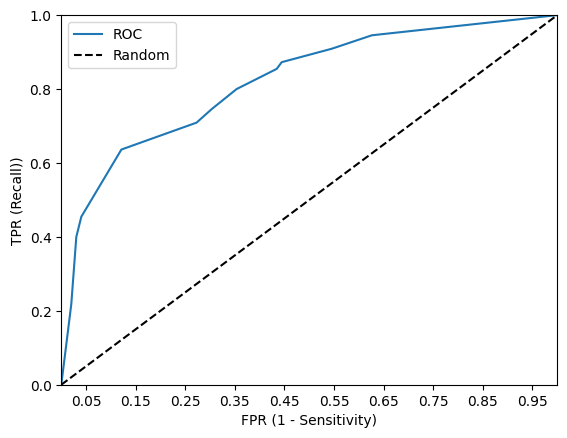

In [31]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_1)

plt.plot(fprs, tprs, label='ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR (1 - Sensitivity)')
plt.ylabel('TPR (Recall))')    

plt.legend()
plt.show()

In [33]:
# Logistic regrssion 을 이용한 학습
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)


lr_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

lg_pred = lr_clf.predict(X_test)
lg_pred_proba = lr_clf.predict_proba(X_test)
lg_pred_proba_1 = lg_pred_proba[:, 1]


dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)
dt_pred_proba_1 = dt_pred_proba[:, 1]

In [34]:
lg_acc = accuracy_score(y_test , lg_pred)
lg_prec = precision_score(y_test , lg_pred)
lg_rec = recall_score(y_test , lg_pred)
lg_auc_score = roc_auc_score(y_test , lg_pred_proba_1)

# 
dt_acc = accuracy_score(y_test , dt_pred)
dt_prec = precision_score(y_test , dt_pred)
dt_rec = recall_score(y_test , dt_pred)
dt_auc_score = roc_auc_score(y_test , dt_pred_proba_1)


In [35]:

print(f'logistic의 정확도 : {lg_acc} 이고 decisionTree의 정확도 : {dt_acc} 이다. ')
print(f'========================================================================')
print(f'logistic의 정밀도 : {lg_prec} 이고 decisionTree의 정밀도 : {dt_prec} 이다. ')
print(f'========================================================================')
print(f'logistic의 재현율 : {lg_rec} 이고 decisionTree의 재현율 : {dt_rec} 이다. ')
print(f'========================================================================')
print(f'logistic의 roc_auc 값은 : {lg_auc_score} 이고 decisionTree의 roc_auc 값은 : {dt_auc_score} 이다. ')


logistic의 정확도 : 0.7532467532467533 이고 decisionTree의 정확도 : 0.7922077922077922 이다. 
logistic의 정밀도 : 0.6491228070175439 이고 decisionTree의 정밀도 : 0.7446808510638298 이다. 
logistic의 재현율 : 0.6727272727272727 이고 decisionTree의 재현율 : 0.6363636363636364 이다. 
logistic의 roc_auc 값은 : 0.8146923783287419 이고 decisionTree의 roc_auc 값은 : 0.820752984389348 이다. 


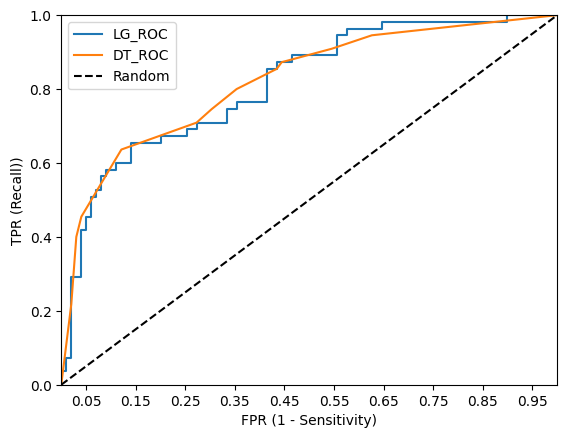

In [38]:
from sklearn.metrics import roc_curve

lg_fprs, lg_tprs, lg_thresholds  = roc_curve(y_test, lg_pred_proba_1)
dt_fprs, dt_tprs, dt_thresholds  = roc_curve(y_test, dt_pred_proba_1)


plt.plot(lg_fprs, lg_tprs, label='LG_ROC')
plt.plot(dt_fprs, dt_tprs, label='DT_ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random')


start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR (1 - Sensitivity)')
plt.ylabel('TPR (Recall))')    

plt.legend()
plt.show()